# Resource

Example taken fron the following tutorial:

https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

# Simple Linear Regression

Model

$$
\hat y_i = ax_i + b 
$$

For input-ouput pairs $(x_i, y_i)$, we want to find best parameters $(a,b)$ that minimize our loss function

MSE (Mean Suquare Error) Loss

$$
J(a,b) = \frac{1}{2n}\sum^n_i (\hat y_i  - y_i)^2
$$

## Generate Data

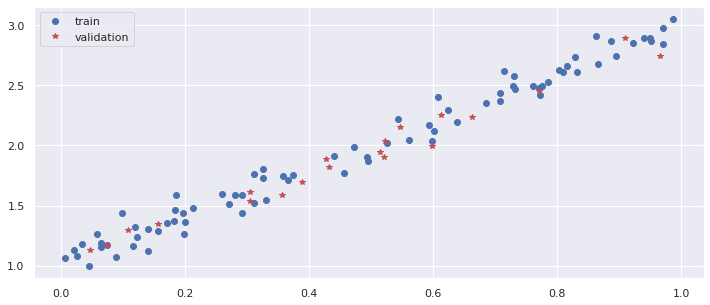

In [ ]:
# Simple Linear Regression

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


plt.figure(figsize=(12,5))
plt.plot(x_train, y_train, 'o', label = 'train')
plt.plot(x_val, y_val, 'r*', label = 'validation')
plt.legend()

Train model on (blue) train data, and report performance on (red) validation data

__Model__

$$
\hat y_i = ax_i + b 
$$

__MSE (Mean Suquared Error) Loss__

$$
J(a,b) = \frac{1}{2n}\sum^n_i (\hat y_i  - y_i)^2
$$

## Compute Gradients

by using chain rule
$$
\frac{dJ(a,b)}{da} = \frac{dJ(a,b)}{d\hat y_i} \frac{d \hat y_i}{da} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i) \frac{d \hat y_i}{da} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i) x_i
$$

Similarly

by using chain rule
$$
\frac{dJ(a,b)}{db} = \frac{dJ(a,b)}{d\hat y_i} \frac{d \hat y_i}{db} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i) \frac{d \hat y_i}{db} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i) (1)
$$

So

$$
\frac{dJ(a,b)}{da} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i) x_i
$$

and

$$
\frac{dJ(a,b)}{db} = \frac{1}{n}\sum^n_i (\hat y_i  - y_i)
$$

## Apply Gradient Descent
initialize w randomly

Repeat:

 - $w = w  - \alpha \frac{dJ(w)}{dw} $

In [ ]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print('# a and b after initialization')
print(a, b)

# Sets learning rate
alpha = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (yhat - y_train)
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = error.mean()
    b_grad = (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - alpha * a_grad
    b = b - alpha * b_grad
print('# a and b after our gradient descent')
print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print('# intercept and coef from Scikit-Learn')
print(linr.intercept_, linr.coef_[0])

# a and b after initialization
[0.49671415] [-0.1382643]
# a and b after our gradient descent
[1.02392018] [1.96822204]
# intercept and coef from Scikit-Learn
[1.02354075] [1.96896447]


## Linear Regression with Pytorch

In [ ]:
# Loading Data
import torch
import torch.optim as optim
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())
# torch.cuda.FloatTensor >> GPU

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [ ]:
device == 'cuda', device == 'cpu'

(False, True)

In [ ]:
# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


## Optimizers

In [ ]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()

    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [ ]:
## Loss Function

In [ ]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    # No more manual loss!
    #error = yhat - y_train_tensor
    #loss = (error ** 2).mean()

    loss = loss_fn(y_train_tensor, yhat)
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    optimizer.step()
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [ ]:
# Linear Model
learning_rate = 1e-1

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(1, 5),
    nn.Linear(5, 1)
)
model.to(device) # Convert to CUDA

# nn package also has different loss functions.
# we use MSE loss for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(x_train_tensor)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

In [ ]:
for name, param in model.named_parameters():
  print(name, '>>', param.data)

0.weight >> tensor([[-0.2871],
        [ 0.4555],
        [-0.2893],
        [ 1.1028],
        [ 1.0779]])
0.bias >> tensor([-0.5910,  0.7307,  0.3105,  0.5372, -0.0977])
1.weight >> tensor([[-0.1373,  0.3588, -0.0112,  0.9124,  0.7020]])
1.bias >> tensor([0.2621])


Example taken from https://github.com/Atcold/pytorch-Deep-Learning/blob/master/05-regression.ipynb

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [ ]:
#from res.plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

Shapes:
X: (100, 1)
y: (100, 1)


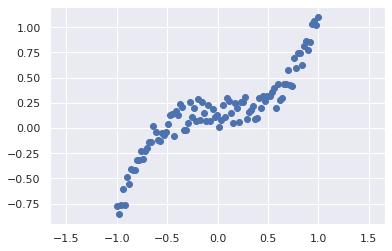

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

In [ ]:
# Linear Model

learning_rate = 1e-3
lambda_l2 = 1e-5


# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) # Convert to CUDA

# nn package also has different loss functions.
# we use MSE loss for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS or MSE]: 0.029701


In [ ]:
# Plot trained model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


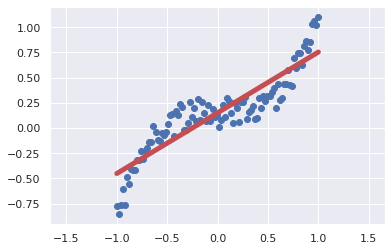

In [ ]:
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

In [ ]:
# Two layered Network

learning_rate = 1e-3
lambda_l2 = 1e-5

# Number of networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(H, C)
    )
    model.to(device)
    
    # Append models
    models.append(model)

    # we use the optim package to apply
    # ADAM for our parameter updates
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # e = 1.  # plotting purpose

    # Training
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)
        
        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

[MODEL]: 10, [EPOCH]: 999, [LOSS]: 0.007534


In [ ]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


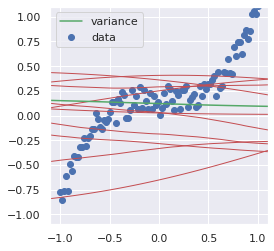

In [ ]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
        
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

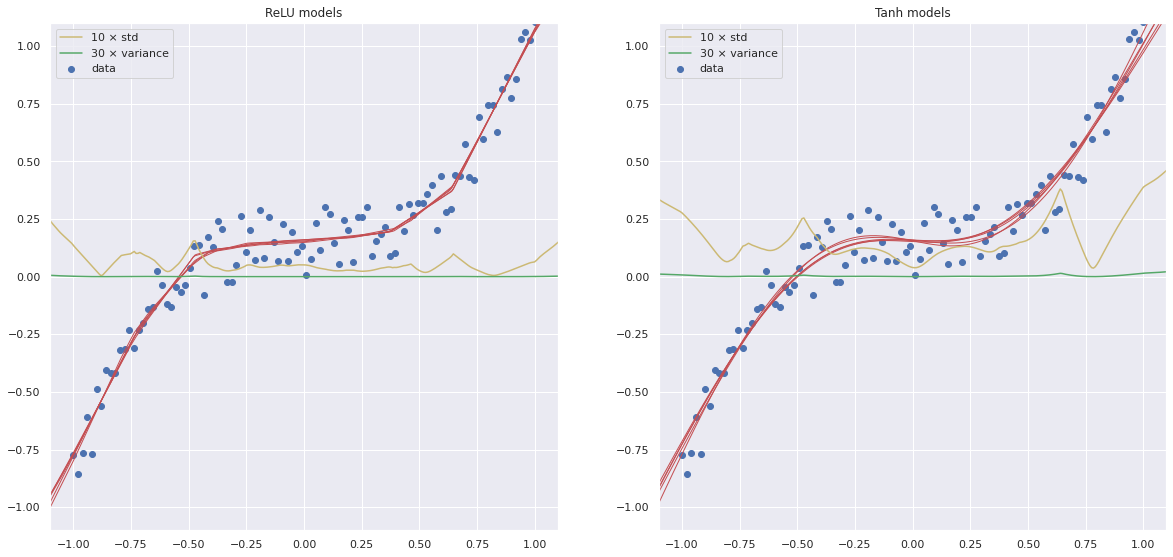

In [ ]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1).to(device)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)